In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
import os
import sqlite3
import warnings

warnings.simplefilter('ignore')

# Choropleth map

After running all cells in the notebook "<strong>2018_WebScraping.ipynb</strong>," all data are stored in a database. A pandas dataframe will be created using the stored data in the next cell. In order to get data, SQL commands should be used.

In [47]:
common_path = os.getcwd()
datpath = common_path + "/output/lausanne_marathon.db" # database

# SQL
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

df_all_cat = pd.read_sql_query(sql="SELECT country, region, age, time, gender, category FROM all_categories", con=conn) # SQL command

# close
conn.close()

df_all_cat.head()

,country,region,age,time,gender,category
0,MAR,Africa,33.0,142.266667,male,42km
1,ETH,Africa,39.0,143.833333,male,42km
2,ETH,Africa,35.0,145.000000,male,42km
3,FRA,Europe,28.0,148.716667,male,42km
4,POL,Europe,39.0,148.950000,male,42km


The names of countries and number of counts are saved as a new dataframe.

In [48]:
df_country=pd.DataFrame({'country':df_all_cat['country'].value_counts().index ,
                         'count':df_all_cat['country'].value_counts().values})

df_country.head()

,country,count
0,CHE,6087
1,FRA,1814
2,ITA,293
3,DEU,270
4,GBR,262


An interactive map is created using folium. 

In [49]:
f=open(os.getcwd() + '/world-countries.geojson','r')
world_geo=json.load(f)

world_map = folium.Map()
world_map.choropleth(
    geo_data=world_geo,
    data=df_country,
    columns=['country','count'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
)

world_map.save(common_path +'/output/map1.html') # save the map

world_map

Since the number of participants from Switzerland and France are quite large compared to other countries, the color scale of the choropleth map does not work properly. Hence, the data of Switzerland and France are omitted just for obtaining a better choropleth map.

In [50]:
f=open(os.getcwd() + '/world-countries.geojson','r')
world_geo=json.load(f)

world_map = folium.Map()
world_map.choropleth(
    geo_data=world_geo,
    data=df_country.iloc[2:],
    columns=['country','count'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
)

world_map.save(common_path +'/output/map2.html') # save the map

world_map

# Number of participants

## Diversity of nationalities

### 42 km

In [58]:
common_path = os.getcwd()
datpath = common_path + "/output/lausanne_marathon.db" # database

# SQL
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

df_2018male42 = pd.read_sql_query(sql="SELECT * FROM male42km", con=conn) # SQL command
df_2018female42 = pd.read_sql_query(sql="SELECT * FROM female42km", con=conn) # SQL command

# close
conn.close()

df_2018male42.drop(columns='index', inplace=True)
df_2018female42.drop(columns='index', inplace=True)

df_2018male42.head()

,country,region,age,time,time_0-21km,time_21-42km
0,MAR,Africa,33,142.266667,72.300000,69.966667
1,ETH,Africa,39,143.833333,72.300000,71.533333
2,ETH,Africa,35,145.000000,71.966667,73.033333
3,FRA,Europe,28,148.716667,71.966667,76.750000
4,POL,Europe,39,148.950000,73.150000,75.800000


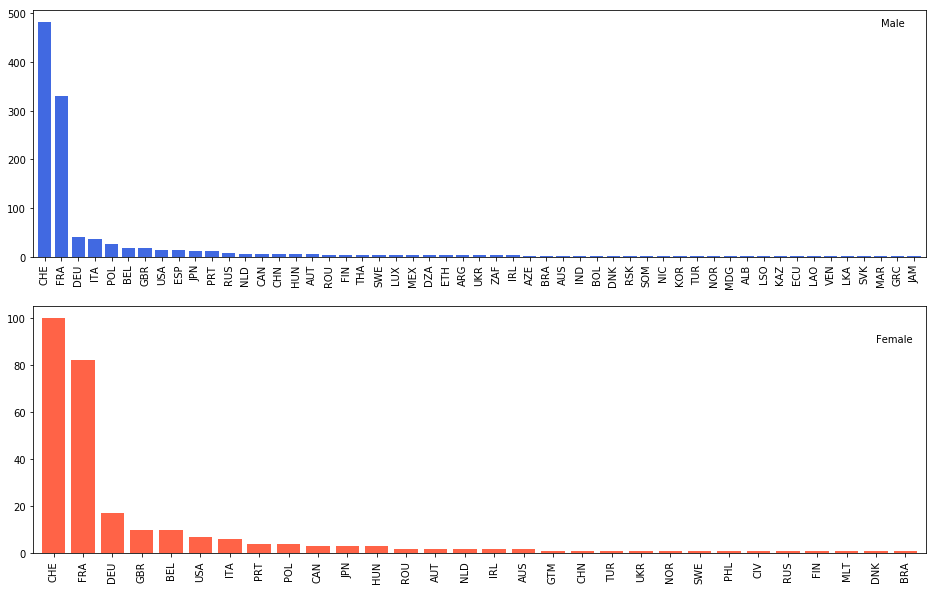

In [59]:
plt.figure(figsize=(16,10))

plt.subplot(211)
country_label=df_2018male42['country'].value_counts().index
num_country_male=country_label.shape[0] # number of countries (male)
height=df_2018male42['country'].value_counts()

plt.bar(np.linspace(0,num_country_male-1,num_country_male), height, tick_label=country_label, align="center", color='royalblue')
plt.xticks(rotation=90)
plt.xlim([-0.7,num_country_male-0.3])
plt.text(num_country_male-3,height.max()-10,'Male')

plt.subplot(212)
country_label=df_2018female42['country'].value_counts().index
num_country_female=country_label.shape[0] # number of countries (female)
height=df_2018female42['country'].value_counts()

plt.bar(np.linspace(0,num_country_female-1,num_country_female), height, tick_label=country_label, align="center", color='tomato')
plt.xticks(rotation=90)
plt.xlim([-0.7,num_country_female-0.3])
plt.text(num_country_female-2, height.max()-10,'Female')

plt.show()

### 21 km

In [60]:
common_path = os.getcwd()
datpath = common_path + "/output/lausanne_marathon.db" # database

# SQL
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

df_2018male21 = pd.read_sql_query(sql="SELECT * FROM male21km", con=conn) # SQL command
df_2018female21 = pd.read_sql_query(sql="SELECT * FROM female21km", con=conn) # SQL command

# close
conn.close()

df_2018male21.drop(columns='index', inplace=True)
df_2018female21.drop(columns='index', inplace=True)

df_2018male21.head()

,country,region,age,time
0,ETH,Africa,31,66.933333
1,ETH,Africa,26,67.133333
2,CHE,Europe,33,68.850000
3,KEN,Africa,31,69.233333
4,MAR,Africa,40,69.966667


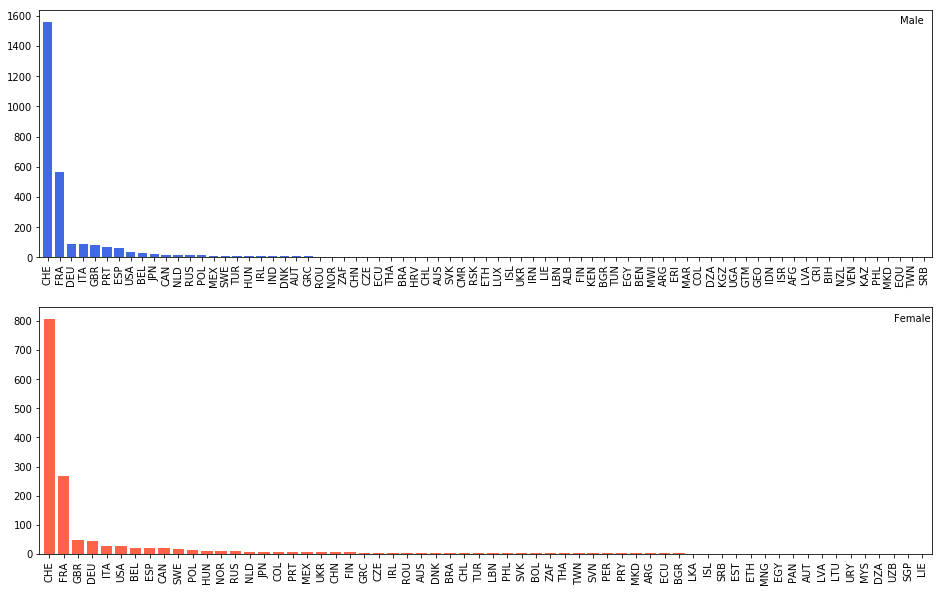

In [61]:
plt.figure(figsize=(16,10))

plt.subplot(211)
country_label=df_2018male21['country'].value_counts().index
num_country_male=country_label.shape[0] # number of countries (male)
height=df_2018male21['country'].value_counts()

plt.bar(np.linspace(0,num_country_male-1,num_country_male), height, tick_label=country_label, align="center", color='royalblue')
plt.xticks(rotation=90)
plt.xlim([-0.7,num_country_male-0.3])
plt.text(num_country_male-3,height.max()-10,'Male')

plt.subplot(212)
country_label=df_2018female21['country'].value_counts().index
num_country_female=country_label.shape[0] # number of countries (female)
height=df_2018female21['country'].value_counts()

plt.bar(np.linspace(0,num_country_female-1,num_country_female), height, tick_label=country_label, align="center", color='tomato')
plt.xticks(rotation=90)
plt.xlim([-0.7,num_country_female-0.3])
plt.text(num_country_female-3, height.max()-10,'Female')

plt.show()

### 10 km

In [62]:
common_path = os.getcwd()
datpath = common_path + "/output/lausanne_marathon.db" # database

# SQL
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

df_2018male10 = pd.read_sql_query(sql="SELECT * FROM male10km", con=conn) # SQL command
df_2018female10 = pd.read_sql_query(sql="SELECT * FROM female10km", con=conn) # SQL command

# close
conn.close()

df_2018male10.drop(columns='index', inplace=True)
df_2018female10.drop(columns='index', inplace=True)

df_2018male10.head()

,country,region,age,time
0,KEN,Africa,30.0,29.150000
1,CHE,Europe,29.0,29.283333
2,MAR,Africa,32.0,29.816667
3,FRA,Europe,34.0,30.016667
4,KEN,Africa,25.0,30.033333


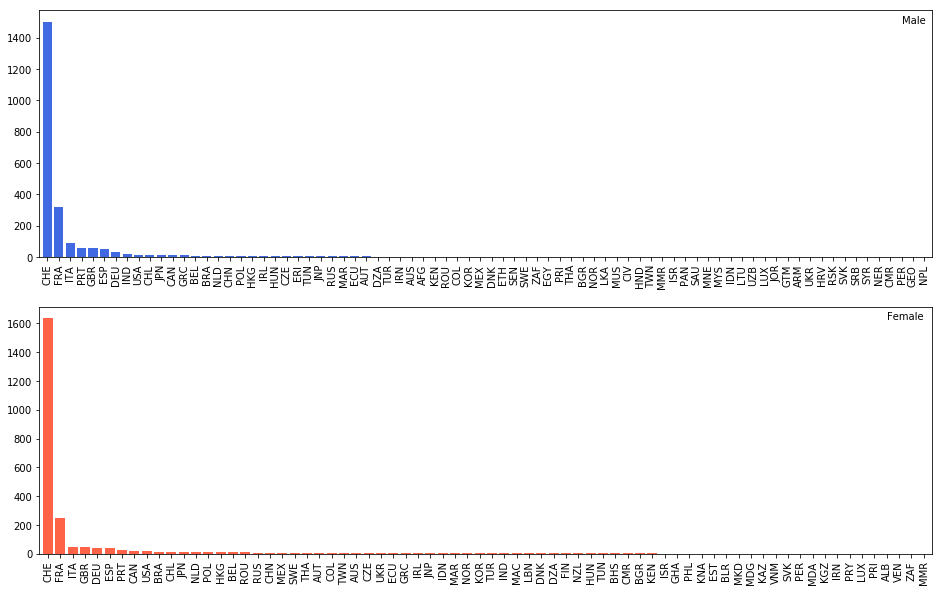

In [63]:
plt.figure(figsize=(16,10))

plt.subplot(211)
country_label=df_2018male10['country'].value_counts().index
num_country_male=country_label.shape[0] # number of countries (male)
height=df_2018male10['country'].value_counts()

plt.bar(np.linspace(0,num_country_male-1,num_country_male), height, tick_label=country_label, align="center", color='royalblue')
plt.xticks(rotation=90)
plt.xlim([-0.7,num_country_male-0.3])
plt.text(num_country_male-3,height.max()-10,'Male')

plt.subplot(212)
country_label=df_2018female10['country'].value_counts().index
num_country_female=country_label.shape[0] # number of countries (female)
height=df_2018female10['country'].value_counts()

plt.bar(np.linspace(0,num_country_female-1,num_country_female), height, tick_label=country_label, align="center", color='tomato')
plt.xticks(rotation=90)
plt.xlim([-0.7,num_country_female-0.3])
plt.text(num_country_female-4, height.max()-10,'Female')

plt.show()